## Práctica 2
En esta práctica, los alumnos tendrán la oportunidad de aplicar el algoritmo KNN para clasificar el estatus de ordenes de comida en un conjunto de datos de compras en línea de una tienda de alimentos. El conjunto de datos contiene información demográfica sobre los clientes e información geográfica sobre los pedidos. El archivo onlinefoods.csv lo pueden descargar de la carpeta datos que se encuentra aquí mismo en el molde

### Actividades:

### Exploración de Datos: 
Los alumnos comenzarán explorando el conjunto de datos para comprender su estructura y las variables presentes. Deberán identificar las características relevantes para la clasificación de estatus de pedidos.
### Limpieza de Datos:
 Los alumnos realizarán tareas de limpieza de datos, como el manejo de valores faltantes y la eliminación de duplicados, para garantizar la calidad de los datos.
### Normalización de Datos: 
Los alumnos aplicarán técnicas de normalización, como escalar características numéricas y codificar características categóricas, para preparar los datos para el modelado. Esto garantizará que todas las características contribuyan de manera equitativa al modelo.
División de Datos: Se dividirá el conjunto de datos limpios y normalizados en conjuntos de entrenamiento y prueba para la evaluación del modelo KNN.
### Encontrar el k ideal:
Los alumnos deberán ejecutar el proceso para encontrar el número de vecinos ideales para el entrenamiento y evaluación del modelo.
### Entrenamiento del Modelo: 
Los alumnos implementarán y entrenarán un modelo KNN
### Evaluación del Modelo: 
Se evaluará el rendimiento del modelo KNN utilizando las siguientes métricas de evaluación: accuracy, precision, recall, matriz de confusión
### Visualización: 
Los alumnos tendrán que realizar gráficas para visualizar la distribución de los datos en la fase de exploración de los datos, el accuracy respecto al número de vecinos, así como la distribución de las clases en las que se pueden categorizar los pedidos.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

### Visualización de los datos 

In [2]:
datos = pd.read_csv("onlinefoods.csv")

In [3]:
datos

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [4]:
print(datos.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [5]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [6]:
datos = pd.get_dummies(datos, drop_first=True)
datos

,Age,Family size,latitude,longitude,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,...,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Positive,Unnamed: 12_Yes
0,20,4,12.9766,77.5993,560001,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,1
1,24,3,12.9770,77.5773,560009,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
2,22,3,12.9551,77.6593,560017,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
3,22,6,12.9473,77.5616,560019,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,1
4,22,4,12.9850,77.5533,560010,1,0,1,0,0,...,1,0,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,2,12.9766,77.5993,560001,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,1
384,23,4,12.9854,77.7081,560048,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,1
385,22,5,12.9850,77.5533,560010,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,1
386,23,2,12.9770,77.5773,560009,1,0,1,0,0,...,1,0,0,0,1,0,0,1,1,1


In [7]:
datos.head(5)

,Age,Family size,latitude,longitude,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,...,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Positive,Unnamed: 12_Yes
0,20,4,12.9766,77.5993,560001,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,1
1,24,3,12.9770,77.5773,560009,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
2,22,3,12.9551,77.6593,560017,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
3,22,6,12.9473,77.5616,560019,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,1
4,22,4,12.9850,77.5533,560010,1,0,1,0,0,...,1,0,0,0,1,0,0,1,1,1


In [8]:
columnasEliminar = ['Output_Yes', 'Unnamed: 12_Yes']
X = datos.drop(columnasEliminar,axis=1)
y = datos['Output_Yes']

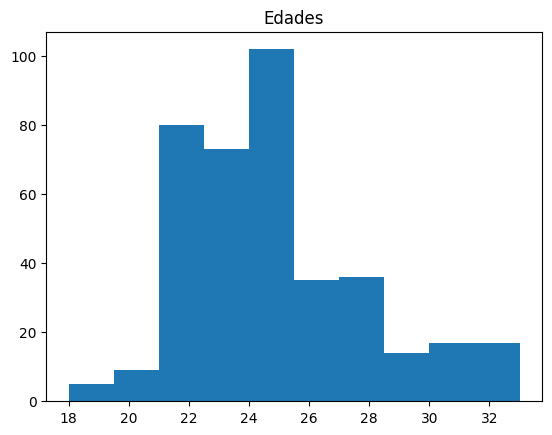

In [9]:

plt.hist(datos['Age'])
plt.title("Edades")
plt.show()

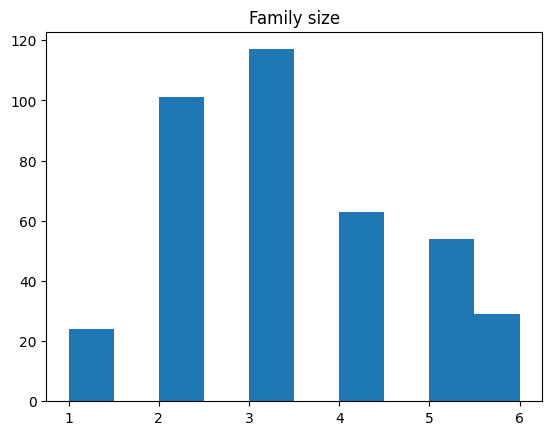

In [10]:
plt.hist(datos['Family size'])
plt.title('Family size')
plt.show()

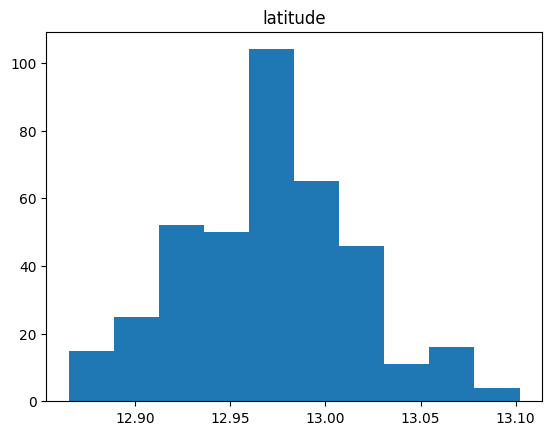

In [11]:
plt.hist(datos['latitude'])
plt.title('latitude')
plt.show()

In [12]:
X = X.select_dtypes(include='number')
X_means = X.mean()
X_std = X.std()

In [13]:
def z(x, mean, std):
    return (x - mean)/std

In [14]:
for col in X:
    X[col] = z(X[col],X_means[col],X_std[col])

In [15]:
def calcular_distancia(p1, p2):
    # Calcular la distancia euclidiana entre dos puntos 
    return np.sqrt(np.sum(p2-p1)**2)

In [16]:
def Knn(datos_train, categorias, dato_clasificar, k):
    # Implementación del algoritmo k-NN
    distancias = []
    for i in range(len(datos_train)):
        distancia = calcular_distancia(datos_train.iloc[i], dato_clasificar)
        distancias.append((distancia, categorias.iloc[i]))
    
    # Ordenar las distancias por tamaño
    distancias.sort(key=lambda x: x[0])
    
    # Obtener los primeros k vecinos más cercanos
    vecinos = distancias[:int(k)]  # Convertir k a entero
    
    # Contar las clases de los vecinos
    clases = {}
    for vecino in vecinos:
        etiqueta = vecino[1]
        if etiqueta in clases:
            clases[etiqueta] += 1
        else:
            clases[etiqueta] = 1
    
    # Predecir la clase basada en los vecinos más cercanos
    clase_predicha = max(clases, key=clases.get)
    return clase_predicha

In [17]:
X_test,X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Validacion cruzada para encontrar el k (vecinos) ideal
folds =12
# Diferentes valores de K para saber el ideal 
valores_k = datos
# Arreglo de accuracy para calcular el mejor accuracy
accuracies = []

In [20]:
for k in valores_k:
    fold_accuracies = []
    for i in range(folds):
        # Obtener datos de entrenamiento y prueba para este fold
        datos_train_fold = X_train
        etiquetas_train_fold = y_train
        datos_test = X_test
        etiquetas_test = y_test
        
        # Realizar predicciones utilizando KNN
        predicciones = []
        for j in range(len(datos_test)):
            clase_predicha = Knn(datos_train_fold, etiquetas_train_fold, datos_test.iloc[j], k)
            predicciones.append(clase_predicha)
        
        # Evaluar el modelo
        accuracy = accuracy_score(etiquetas_test, predicciones)
        fold_accuracies.append(accuracy)
    
    # Calcular el promedio de accuracy para este valor de k
    prom_accuracy = np.mean(fold_accuracies)
    accuracies.append(prom_accuracy)

TypeError: slice indices must be integers or None or have an __index__ method